# LAB 1: ANN and PyTorch

In this lab, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work.

Then in the second part of the lab you will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks 
you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the lab,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://drive.google.com/file/d/19aaP1sRsC9yPMik6jcuWjV90iXIUm39d/view?usp=sharing

#PART A: Constructing a Neural Network [15 pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Part 0. Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [12]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [13]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [14]:
#raw_data = raw_data.values

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [15]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [16]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [17]:
#verify one-hot encoding
y_train[:5,:]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Part 1. Develop a 2-layer ANN [5 pt]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [18]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)
  
  # softmax
  output = softmax(layer2)
 
  #Back propagation using gradient descent
  
  #cross-entropy loss
  # TO BE COMPLETED
  # np.log will output nan if input < 0. Without final activation function, nan will be outputed for this reason.
  error = -np.sum(y_train*np.log(output))

  #initialize gradients to zero 
  dw0 = np.zeros((num_features,num_hidden))# TO BE COMPLETED
  dw1 = np.zeros((num_hidden,num_outputs))# TO BE COMPLETED

  #calculate gradients
  # TO BE COMPLETED
  dL_du = output-y_train
  du_dv_hat = w1.T
  dv_hat_dv = layer1*(1-layer1)
  dv_dw0 = X_train
  du_dw1 = layer1  

  #determine gradients
  #dw1 += du_dw1.T.dot(dL_du_hat*du_hat_du)
  dw1 += du_dw1.T.dot(dL_du)
  #dw0 += dv_dw0.T.dot((dL_du_hat*du_hat_du).dot(du_dv_hat)*(dv_hat_dv))
  dw0 += dv_dw0.T.dot((dL_du).dot(du_dv_hat)*(dv_hat_dv))

  
  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))# TO BE COMPLETED

  return (error, dW, output)


### Part 2. Train your neural network. How well does your network work on the iris dataset? [5 pt]

In [19]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)


In [20]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 0)
pred[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [21]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
# accuracy of training
np.sum(np.argmax(pred, axis=1) == np.argmax(train, axis=1))/len(train)

1.0

### Part 3. Validate that the gradients were computed correctly for the 2-layer neural network you developed. [5 pt]

In [23]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))# TO BE COMPLETED

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
  
  #increment slightly
  We1[ind] = We1[ind] + 0.000001# TO BE COMPLETED
  We2[ind] = We2[ind] - 0.000001# TO BE COMPLETED
  
  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
  #print(error_e1,error_e2)
  #obtain numerical gradients
  grad_num = (error_e1-error_e2)/0.000002# TO BE COMPLETED
  
  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0 0.13094533102275818 0.13094532534492304
0.0 19.296368648724638 19.296368649083995
0.0 -3.8085856886027614 -3.808585688495292
0.0 -0.48131548169294547 -0.4813154782240307
0.0 3.3505579182246947 3.3505579110620407
0.0 0.09338732809283101 0.0933873255070474
0.0 8.032009766623105 8.032009765188644
0.0 -4.729567706363014 -4.729567704924837
0.0 -0.7449927963421032 -0.7449927953507864
0.0 -1.8683334417346487 -1.8683334385302315
0.0 0.03432490558452628 0.034324910100516776
0.0 16.72148532350093 16.721485308801494
0.0 3.329985567290805 3.3299855714544315
0.0 0.5539812946153688 0.5539812904449628
0.0 9.788978985625363 9.78897898186118
0.0 0.004815795762169728 0.004815783016355966
0.0 5.7451822357279525 5.745182232681851
0.0 1.7900081701327508 1.7900081736799367
0.0 0.25308686701919214 0.25308686779348505
0.0 4.0680416120153495 4.0680416005144915
0.0 11.446944171211726 11.446944180726252
0.0 10.226336755181364 10.22633676112458
0.0 -21.673280933498518 -21.673280941850845
0.0 2.002454756677707

# PART B: Cars vs Trucks [35 pt]

In the second part of the lab we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [24]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [25]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    
    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data [5 pt]

We will make use of some of the CIFAR-10 data set, which consists of 
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the car and truck categories. 
We have included code that automatically downloads the dataset the 
first time that the main script is run.

In [26]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=1) # One image per batch

Files already downloaded and verified
Files already downloaded and verified


### Part (a) -- 1 pt

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

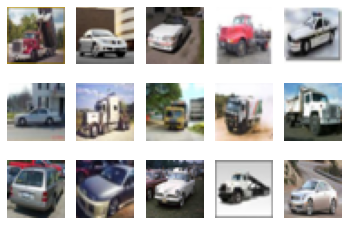

In [27]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

### Part (b) -- 2 pt

How many training examples do we have for the combined `car` and `truck` classes? 
What about validation examples? 
What about test examples?

There is only 1 image per batch

8000 train samples, 2000 validation and 2000 test samples

In [28]:
count = 0
for images, labels in train_loader:
  count += 1
count

8000

In [29]:
for images, labels in train_loader:
  print(images.shape)
  break

torch.Size([1, 3, 32, 32])


In [30]:
count = 0
for images, labels in val_loader:
  count += 1
count

2000

In [31]:
for images, labels in val_loader:
  print(images.shape)
  break

torch.Size([1, 3, 32, 32])


In [32]:
count = 0
for images, labels in test_loader:
  count += 1
count

2000

In [33]:
for images, labels in test_loader:
  print(images.shape)
  break

torch.Size([1, 3, 32, 32])


### Part (c) -- 2pt

Why do we need a validation set when training our model? What happens if we judge the 
performance of our models using the training set loss/error instead of the validation
set loss/error?

You can use it to evaluate/tune the performance of your model for different combinations of hyperparameter values and will increase the generalizing capability of the model on new unseen data. <br>
We can't judge the performance of our model using the training set loss/error because our model will simply remember the training set. Therefore we can get very high training accuracy but the fact is that the model does not learn anything. This will make us overly optimistic about the model's ability.

## Part 2. Training [10 pt]

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [34]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [35]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [36]:
small_net = SmallNet()
large_net = LargeNet()

### Part (a) -- 1pt

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values. 

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

There are 9705 parameters in largenet and 386 parameters in smallnet

In [37]:
small_net

SmallNet(
  (conv): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=245, out_features=1, bias=True)
)

In [38]:
large_net

LargeNet(
  (conv1): Conv2d(3, 5, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 10, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=250, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)

In [39]:
sum(p.numel() for p in large_net.parameters())

9705

In [40]:
for param in large_net.parameters():
    print(param.shape)

torch.Size([5, 3, 5, 5])
torch.Size([5])
torch.Size([10, 5, 5, 5])
torch.Size([10])
torch.Size([32, 250])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


In [41]:
sum(p.numel() for p in small_net.parameters())

386

In [42]:
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [43]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (b) -- 1pt

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on. 

What are the default values of the parameters `batch_size`, `learning_rate`, 
and `num_epochs`?

The default values are : batch_size = 64, learning_rate = 0.01, num_epochs = 30

### Part (c) -- 1 pt

What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

The training error, loss as well as validation error, loss are saved as 4 csv files. They contain the training error and loss, validation error and loss correspondingly for the 5 epochs. Some checkpoint files are also saved for each epoch.

In [44]:
['model_small_bs64_lr0.01_epoch0', 'model_small_bs64_lr0.01_epoch1', 'model_small_bs64_lr0.01_epoch2','model_small_bs64_lr0.01_epoch3','model_small_bs64_lr0.01_epoch4',
 'model_small_bs64_lr0.01_epoch4_train_err.csv','model_small_bs64_lr0.01_epoch4_train_loss.csv','model_small_bs64_lr0.01_epoch4_val_err.csv','model_small_bs64_lr0.01_epoch4_val_loss.csv']

['model_small_bs64_lr0.01_epoch0',
 'model_small_bs64_lr0.01_epoch1',
 'model_small_bs64_lr0.01_epoch2',
 'model_small_bs64_lr0.01_epoch3',
 'model_small_bs64_lr0.01_epoch4',
 'model_small_bs64_lr0.01_epoch4_train_err.csv',
 'model_small_bs64_lr0.01_epoch4_train_loss.csv',
 'model_small_bs64_lr0.01_epoch4_val_err.csv',
 'model_small_bs64_lr0.01_epoch4_val_loss.csv']

In [45]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=5)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.366, Train loss: 0.6344179606437683 |Validation err: 0.3355, Validation loss: 0.6131257507950068
Epoch 2: Train err: 0.317375, Train loss: 0.5949724245071412 |Validation err: 0.314, Validation loss: 0.5975999534130096
Epoch 3: Train err: 0.29025, Train loss: 0.5651104824543 |Validation err: 0.2735, Validation loss: 0.5428021950647235
Epoch 4: Train err: 0.239375, Train loss: 0.5020931327342987 |Validation err: 0.2245, Validation loss: 0.4731797007843852
Epoch 5: Train err: 0.211625, Train loss: 0.4596786410808563 |Validation err: 0.1995, Validation loss: 0.4523981427773833
Finished Training
Total time elapsed: 12.55 seconds


In [108]:
pd.read_csv("model_small_bs64_lr0.01_epoch4_train_err.csv")

,3.659999999999999920e-01
0,0.317375
1,0.290250
2,0.239375
3,0.211625


In [109]:
pd.read_csv("model_small_bs64_lr0.01_epoch4_train_loss.csv")

,6.344179606437683194e-01
0,0.594972
1,0.565110
2,0.502093
3,0.459679


In [110]:
pd.read_csv("model_small_bs64_lr0.01_epoch4_val_err.csv")

,3.355000000000000204e-01
0,0.3140
1,0.2735
2,0.2245
3,0.1995


In [111]:
pd.read_csv("model_small_bs64_lr0.01_epoch4_val_loss.csv")

,6.131257507950067520e-01
0,0.597600
1,0.542802
2,0.473180
3,0.452398


### Part (d) -- 2pt

Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights) 
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive 
so that the files generated by `train_net` gets saved. We will be using
these files in part (d).
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [46]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


largenet takes more times to run because the archetecture of the network is more complex. It has more convolutional layers and linear layers.

time elapsed for training small network : 71.88 seconds

In [47]:
small_net = SmallNet()

In [48]:
train_net(small_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.36675, Train loss: 0.6353887972831727 |Validation err: 0.3415, Validation loss: 0.6150007117539644
Epoch 2: Train err: 0.30875, Train loss: 0.5826501657962799 |Validation err: 0.2875, Validation loss: 0.5644712578505278
Epoch 3: Train err: 0.265, Train loss: 0.5382579987049103 |Validation err: 0.254, Validation loss: 0.5178635669872165
Epoch 4: Train err: 0.24875, Train loss: 0.5111011381149292 |Validation err: 0.244, Validation loss: 0.4938462758436799
Epoch 5: Train err: 0.214625, Train loss: 0.4668754715919495 |Validation err: 0.2205, Validation loss: 0.46126757096499205
Epoch 6: Train err: 0.205625, Train loss: 0.4501127817630768 |Validation err: 0.217, Validation loss: 0.46081416960805655
Epoch 7: Train err: 0.196375, Train loss: 0.4288400921821594 |Validation err: 0.2025, Validation loss: 0.43997925985604525
Epoch 8: Train err: 0.185625, Train loss: 0.41482741475105284 |Validation er

time elapsed for training large network : 77.83 seconds

In [49]:
large_net = LargeNet()

In [50]:
train_net(large_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.410625, Train loss: 0.679657470703125 |Validation err: 0.3755, Validation loss: 0.6593774873763323
Epoch 2: Train err: 0.342625, Train loss: 0.6225746901035308 |Validation err: 0.327, Validation loss: 0.6066721295937896
Epoch 3: Train err: 0.297625, Train loss: 0.5701180148124695 |Validation err: 0.2615, Validation loss: 0.5388268399983644
Epoch 4: Train err: 0.23825, Train loss: 0.49745376873016356 |Validation err: 0.2075, Validation loss: 0.4572064131498337
Epoch 5: Train err: 0.199875, Train loss: 0.43851109814643857 |Validation err: 0.1915, Validation loss: 0.42082085832953453
Epoch 6: Train err: 0.18225, Train loss: 0.40966445207595825 |Validation err: 0.198, Validation loss: 0.4229935137555003
Epoch 7: Train err: 0.15575, Train loss: 0.3648214979171753 |Validation err: 0.17, Validation loss: 0.39207516610622406
Epoch 8: Train err: 0.145375, Train loss: 0.3388852791786194 |Validation 

### Part (e) - 2pt

Use the function `plot_training_curve` to display the trajectory of the 
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

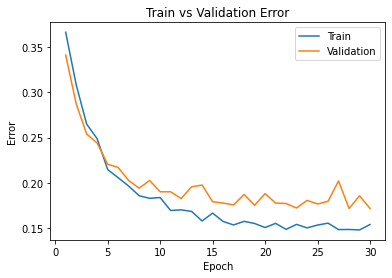

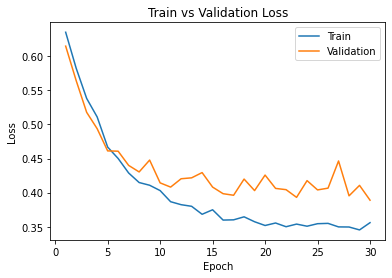

In [51]:
model_path = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

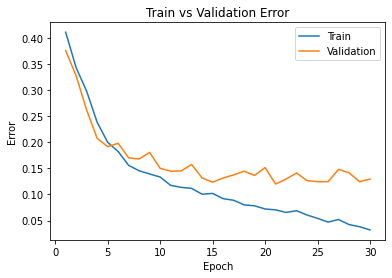

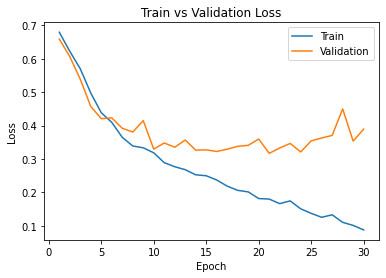

In [52]:
model_path = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

### Part (f) - 3pt

Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

Largenet has the problem of overfitting because we can see that the training loss and error are very low around 30 epochs' training, which is good. But the validation loss and error remains abnormally high. The validation loss of largenet even started increasing after 15 epochs of training. The training and validation curves of largenet have obvious divergences during the training process. Largenet did very good on the training data but poorly on the validation data. From the loss curve of largenet, we observe that : <br>
1.The plot of training loss continues to decrease with experience.
2.The plot of validation loss decreases to a point and begins increasing again.
These are obvious signs of overfitting. We may want to set an early stopping point at 15th epoch.<br>

Smallnet has a typical loss and error curve. We can observe that 
the plot of training loss and error decrease to a point of stability.
The plot of validation loss and error decrease to a point of stability and has a small gap with the training los and error.



## Part 3. Optimization Parameters [4 pt]

For this section, we will work with `large_net` only.

### Part (a) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

It takes a bit shorter to run. But normally，It could take longer to train since the learning rate is lower. It takes longer to converge and find the optimal weights.However this relationship is not guranteed each time we train the network.

A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights. But it requires more frequent updates before reaching the optimal point, which is time-consuming. The parameters don't change much in each iteration.

In [53]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

In [54]:
train_net(net = large_net, learning_rate=0.001)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4585, Train loss: 0.6922090907096863 |Validation err: 0.4145, Validation loss: 0.6918484661728144
Epoch 2: Train err: 0.404, Train loss: 0.6912762846946716 |Validation err: 0.401, Validation loss: 0.6909310109913349
Epoch 3: Train err: 0.39125, Train loss: 0.6897973508834839 |Validation err: 0.3825, Validation loss: 0.6891596261411905
Epoch 4: Train err: 0.391, Train loss: 0.6871493906974793 |Validation err: 0.379, Validation loss: 0.6860427875071764
Epoch 5: Train err: 0.37275, Train loss: 0.6819084882736206 |Validation err: 0.3725, Validation loss: 0.6794121712446213
Epoch 6: Train err: 0.367, Train loss: 0.6722611894607544 |Validation err: 0.3745, Validation loss: 0.6701581478118896
Epoch 7: Train err: 0.367375, Train loss: 0.6595340538024902 |Validation err: 0.3785, Validation loss: 0.6627393439412117
Epoch 8: Train err: 0.364125, Train loss: 0.6492531847953796 |Validation err: 0.3765,

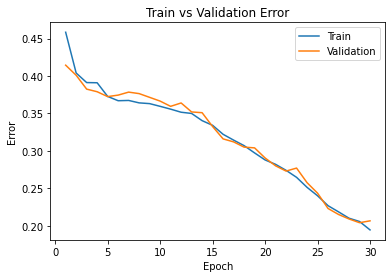

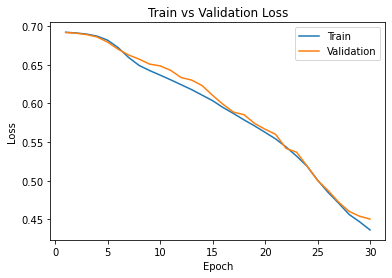

In [55]:
model_path = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

The learning rate controls the amount of apportioned error that the weights of the model are updated each time. We can see from the graph that when using original learning rate, the moodle is overfitting. When using lower learning rate(0.001), the model shows signs of underfitting. One type of underfitting model may be identified by a training loss that is decreasing and continues to decrease at the end of the plot. This is exactaly the case here. This indicates that the model is capable of further learning and possible further improvements and that the training process was halted prematurely. We may want to train for longer epoches. 

### Part (b) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.1`. 
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

It takes a little bit longer to train than the default largenet with lr = 0.01

This result differs each time we train the network

A high learning rate causes drastic updates which makes it very hard for the model to find the minimum point(very "noisy" process). It may overshoot the minimum. It may fail to converge or even diverge and make the training unstable.

In [56]:
large_net = LargeNet()
train_net(net = large_net, learning_rate=0.1)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.34475, Train loss: 0.6162742033004761 |Validation err: 0.325, Validation loss: 0.5957806976512074
Epoch 2: Train err: 0.27625, Train loss: 0.5558951270580291 |Validation err: 0.263, Validation loss: 0.5544741069898009
Epoch 3: Train err: 0.223375, Train loss: 0.4855300731658935 |Validation err: 0.2055, Validation loss: 0.4308580541983247
Epoch 4: Train err: 0.19325, Train loss: 0.4354436628818512 |Validation err: 0.18, Validation loss: 0.40178130846470594
Epoch 5: Train err: 0.17425, Train loss: 0.4035775926113129 |Validation err: 0.19, Validation loss: 0.42512505408376455
Epoch 6: Train err: 0.184625, Train loss: 0.41701974403858183 |Validation err: 0.2, Validation loss: 0.42960863653570414
Epoch 7: Train err: 0.166375, Train loss: 0.3872940249443054 |Validation err: 0.211, Validation loss: 0.4248463879339397
Epoch 8: Train err: 0.157, Train loss: 0.3690873725414276 |Validation err: 0.187

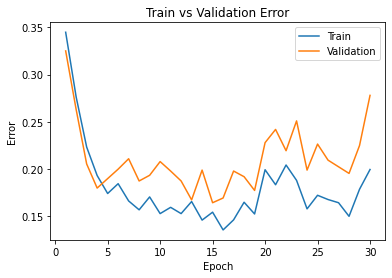

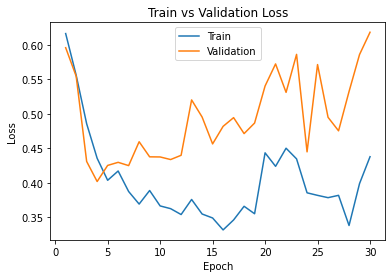

In [57]:
model_path = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)
plot_training_curve(model_path)

We can see that both training error and loss are very high and still increasing after 30 epoch's of training. It suggests that the learning rate is too high and the model finds it hard to find the optimal set of weights. So the model is underfitting. It is not capable enough to do the task.

### Part (c) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

It takes shorter to train than the default largenet with lr = 0.01.

In [58]:
large_net = LargeNet()
train_net(net = large_net, learning_rate=0.01,batch_size=512)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.466, Train loss: 0.6923338547348976 |Validation err: 0.44, Validation loss: 0.6918952614068985
Epoch 2: Train err: 0.413, Train loss: 0.6914851702749729 |Validation err: 0.403, Validation loss: 0.6910877674818039
Epoch 3: Train err: 0.4035, Train loss: 0.6901152208447456 |Validation err: 0.3925, Validation loss: 0.6894860416650772
Epoch 4: Train err: 0.4, Train loss: 0.6876360848546028 |Validation err: 0.393, Validation loss: 0.6864032447338104
Epoch 5: Train err: 0.373625, Train loss: 0.682475633919239 |Validation err: 0.374, Validation loss: 0.6796957403421402
Epoch 6: Train err: 0.364375, Train loss: 0.6726637706160545 |Validation err: 0.3685, Validation loss: 0.6694191545248032
Epoch 7: Train err: 0.36475, Train loss: 0.6583150438964367 |Validation err: 0.3765, Validation loss: 0.6596953421831131
Epoch 8: Train err: 0.364875, Train loss: 0.6487297676503658 |Validation err: 0.38, Valida

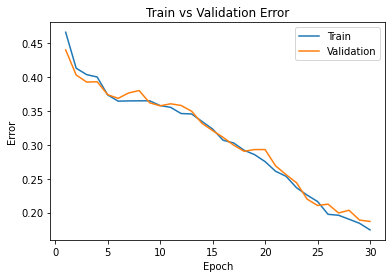

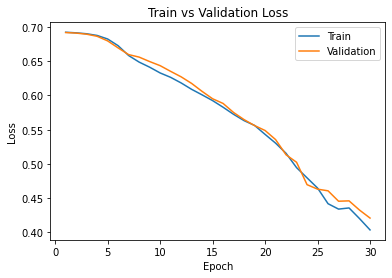

In [59]:
model_path = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

Larger batch size leads to shorter training time. It also leads to lower variance. Large batch size means the model makes very large gradient updates and very small gradient updates. The size of the update depends on which particular samples are drawn from the dataset.<br>
Normally, the training process becomes expensive and the
average loss might not change very much as
batch size grows.

We observed that the training loss is decreasing and continues to decrease at the end of the plot. This is one type of underfitting where the model is capable of learning further and making further improvements and the training process was halted prematurely. We may want to train for longer epoches. 

### Part (d) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

It takes much longer to train than the default largenet with lr = 0.01 since the batch size is smaller

In [60]:
large_net = LargeNet()
train_net(net = large_net, learning_rate=0.01,batch_size=16)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.345125, Train loss: 0.6188138083815574 |Validation err: 0.297, Validation loss: 0.5717946984767914
Epoch 2: Train err: 0.220875, Train loss: 0.4746331752538681 |Validation err: 0.2015, Validation loss: 0.4406975392103195
Epoch 3: Train err: 0.25275, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 4: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 5: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 6: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 7: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 8: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 9: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 10: Train err: 0.502375, Train l

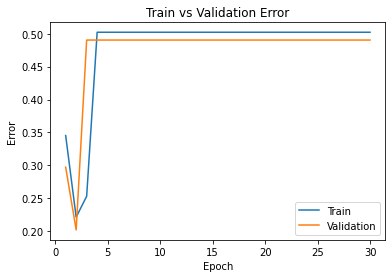

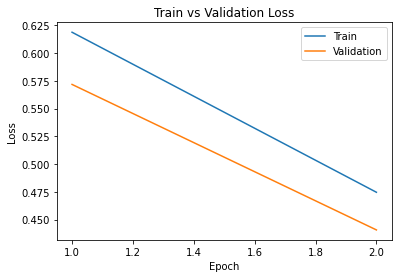

In [61]:
model_path = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

Smaller batch size sometimes leads to longer training time. It also leads to higher variance. small batch size means the model makes updates that are about the same size. The size of the update only weakly depends on which particular samples that are drawn from the dataset. We may optimize a (possibly very) different function loss at each iteration and the learning process may become
noisy.

We can see the model is underfitting. It did badly on both the training and validation set. The error continued to go up from epoch 2-5 and remained at the same high level for the rest of the epoches. It shows a flat line of relatively high loss and error, indicating that the model was unable to learn the training dataset at all.

## Part 4. Hyperparameter Search [4 pt]

### Part (a) - 1pt

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

Based on the experiments above, a suitable value for the learning rate should be between 0.1 and 0.01 and 0.01 to 0.001 since when we use lr=0.1 and 0.001, the model is underfitting and when lr=0.01, the model is underfitting, keeping batch size = 64.<br>
A batch size of 16 makes the model underfitting, so we want to use a higher batch size to avoid underfitting. A batch size of 64 makes the model overfitting and a batch size of 512 makes the model underfitting. Possible values are 32,128,256. As a rule of thumb, we should pair lower learning rate with small batch size and higher learning rate with large batch size to make the training process stable. We will first try lr = 0.001 and batch size = 32.

### Part (b) - 1pt

Train the model with the hyperparameters you chose in part(a), and include the training curve.

In [82]:
large_net = LargeNet()
train_net(net = large_net, learning_rate=0.001,batch_size=32,num_epochs=50)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.43575, Train loss: 0.6917999007701874 |Validation err: 0.4005, Validation loss: 0.6908418961933681
Epoch 2: Train err: 0.391125, Train loss: 0.6885279104709625 |Validation err: 0.3825, Validation loss: 0.6861630687637935
Epoch 3: Train err: 0.369625, Train loss: 0.6772011871337891 |Validation err: 0.3715, Validation loss: 0.6702473986716497
Epoch 4: Train err: 0.364375, Train loss: 0.6550884737968444 |Validation err: 0.3765, Validation loss: 0.6561392876836989
Epoch 5: Train err: 0.366125, Train loss: 0.6408051497936249 |Validation err: 0.3675, Validation loss: 0.6468256532199799
Epoch 6: Train err: 0.3535, Train loss: 0.6287492138147354 |Validation err: 0.3655, Validation loss: 0.6346145243871779
Epoch 7: Train err: 0.34775, Train loss: 0.6156211490631104 |Validation err: 0.3515, Validation loss: 0.6206042586811005
Epoch 8: Train err: 0.33025, Train loss: 0.6000345653295517 |Validation er

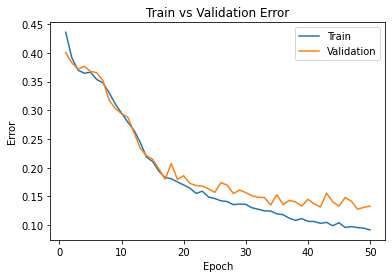

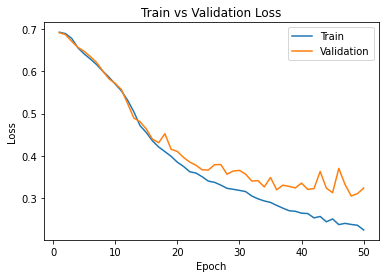

In [83]:
model_path = get_model_name("large", batch_size=32, learning_rate=0.001, epoch=49)
plot_training_curve(model_path)

### Part (c) - 1pt

Based on your result from Part(a), suggest another set of hyperparameter values to try. 
Justify your choice.

We observed that the training loss and error are actually very good. There is no obvious overfitting and underfitting issues.

We can increase the learning rate a little bit since training takes a bit long and we also want a model with faster convergence than the above model.  

### Part (d) - 1pt

Train the model with the hyperparameters you chose in part(c), and include the training curve.

In [77]:
large_net = LargeNet()
train_net(net = large_net, learning_rate=0.002,batch_size=32,num_epochs=50)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.421625, Train loss: 0.6905031290054321 |Validation err: 0.378, Validation loss: 0.6866680960806589
Epoch 2: Train err: 0.371875, Train loss: 0.6683492918014526 |Validation err: 0.3785, Validation loss: 0.6579224069913229
Epoch 3: Train err: 0.363125, Train loss: 0.6386956789493561 |Validation err: 0.364, Validation loss: 0.6366102335945009
Epoch 4: Train err: 0.340125, Train loss: 0.6127383064031601 |Validation err: 0.318, Validation loss: 0.6046360863579644
Epoch 5: Train err: 0.311125, Train loss: 0.5857475532293319 |Validation err: 0.301, Validation loss: 0.5761191821287549
Epoch 6: Train err: 0.28625, Train loss: 0.5569172202348709 |Validation err: 0.287, Validation loss: 0.5534132165568215
Epoch 7: Train err: 0.24525, Train loss: 0.5110175091028214 |Validation err: 0.231, Validation loss: 0.4910934278889308
Epoch 8: Train err: 0.213625, Train loss: 0.46364420938491824 |Validation err:

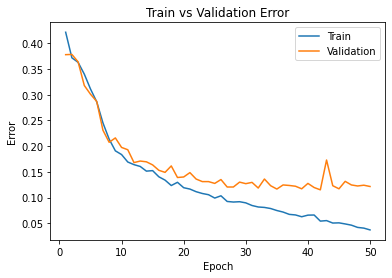

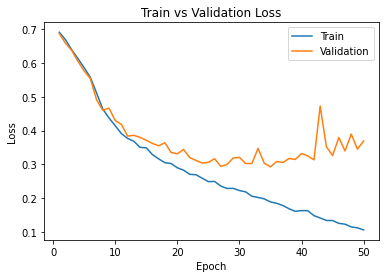

In [78]:
model_path = get_model_name("large", batch_size=32, learning_rate=0.002, epoch=49)
plot_training_curve(model_path)

We can see that the validation loss and error stablize as we train it for more epochs. To prevent overfitting, we should stop early at epoch 35. 

## Part 4. Evaluating the Best Model [9 pt]


### Part (a) - 1pt

Choose the **best** model that you have so far. This means choosing the best model checkpoint,
including the choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`, 
**and the epoch number**.

Modify the code below to load your chosen set of weights to the model object `net`.

The 2 models above are both very good. If we use model 1(lr=0.001), we may want to early stop at epoch 48. If we use model 2(lr=0.002), we should early stop at epoch 35.

When using model2 with epoch = 35, the validation error and loss combined are minimized.(epoch parameter ranges from 0-49, so we should use 34)

In [84]:
net = LargeNet()
model_path = get_model_name('large', batch_size=32, learning_rate=0.002, epoch=34)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

In [85]:
net

LargeNet(
  (conv1): Conv2d(3, 5, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 10, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=250, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)

### Part (b) - 2pt

Justify your choice of model from part (a).

We see from the previous session that when batch_size=32, learning_rate=0.001, epoch=35, it has the lowest validation loss and error among the various model we tested. It is also the least overfit/underfit model we have so far.

### Part (c) - 2pt

Using the code in Part 0, any code from lecture notes, or any code that you write,
compute and report the **test classification error** for your chosen model.

In [86]:
# If you use the `evaluate` function provided in part 0, you will need to 
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [87]:
cnn_err,cnn_loss = evaluate(net,test_loader,nn.BCEWithLogitsLoss())
print("error:",cnn_err, "loss:",cnn_loss)

error: 0.13 loss: 0.3152667754329741


### Part (d) - 2pt

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

The test error is larger than the validation error(The final run gives me validation error = 0.1165 and test error = 0.13)

Validation set is used to tune the hyperparameters and the aim is to acheive better validation accuracy. Therefore, it is more reasonable to see that the validation error will decrease by tuning the hyperparameters and get lower than the test error, because we can't do hyperparamaters tuning for the test set.

### Part (e) - 2pt

Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

Test data is only used when we fully trained our model and wants to know the model's performance on real world data. It is meant to be a substitute for the data in the real world that you’re interested in classifying. It provides an unbiased evaluation of a final model fit on the training dataset. Suppose we use the test data during training. In that case, we'll optimize our loss to fit the test data, so we are not able to get a reasonable estimate of the model performance on unseen data. <br>


## Part 5. Fully-Connected Linear ANN vs CNN [3 pt]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying car and truck images?

In [88]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

Let's first test using the default parameters as before:

In [89]:
ann = simpleANN()
train_net(net = ann, learning_rate=0.01,batch_size=64)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.355625, Train loss: 0.624343219280243 |Validation err: 0.316, Validation loss: 0.6015511639416218
Epoch 2: Train err: 0.2785, Train loss: 0.5526527614593506 |Validation err: 0.272, Validation loss: 0.5497446749359369
Epoch 3: Train err: 0.242625, Train loss: 0.5010732228755951 |Validation err: 0.2595, Validation loss: 0.5269823269918561
Epoch 4: Train err: 0.2205, Train loss: 0.4685604269504547 |Validation err: 0.262, Validation loss: 0.5227180710062385
Epoch 5: Train err: 0.198625, Train loss: 0.4365411604642868 |Validation err: 0.267, Validation loss: 0.5330789964646101
Epoch 6: Train err: 0.1805, Train loss: 0.4033006341457367 |Validation err: 0.2555, Validation loss: 0.5451233284547925
Epoch 7: Train err: 0.166375, Train loss: 0.3756218781471252 |Validation err: 0.247, Validation loss: 0.5454306257888675
Epoch 8: Train err: 0.140625, Train loss: 0.33397353875637054 |Validation err: 0.2

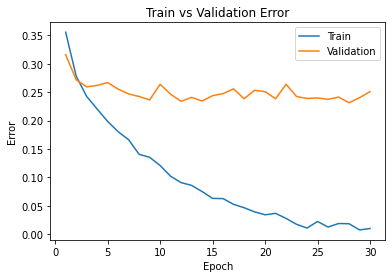

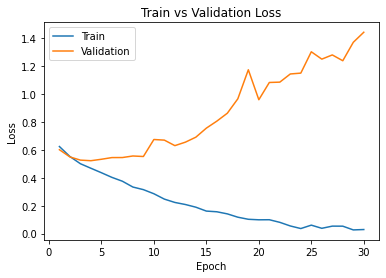

In [90]:
model_path = get_model_name(ann.name, batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

We have severe overfitting problem. 
Since the plot of training loss continues to decrease with num of training epochs increases.
The plot of validation loss decreases to a point and begins increasing again.<br>
Let's try another set of values

In [91]:
ann = simpleANN()
train_net(net = ann, learning_rate=0.1,batch_size=256)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.357625, Train loss: 0.6275592017918825 |Validation err: 0.3025, Validation loss: 0.5857890993356705
Epoch 2: Train err: 0.27275, Train loss: 0.5469584967941046 |Validation err: 0.2745, Validation loss: 0.5436579510569572
Epoch 3: Train err: 0.245125, Train loss: 0.506178455427289 |Validation err: 0.2665, Validation loss: 0.5341814830899239
Epoch 4: Train err: 0.217, Train loss: 0.4607986817136407 |Validation err: 0.2585, Validation loss: 0.5135025084018707
Epoch 5: Train err: 0.194625, Train loss: 0.43423153180629015 |Validation err: 0.2665, Validation loss: 0.541308157145977
Epoch 6: Train err: 0.18825, Train loss: 0.41282553039491177 |Validation err: 0.2525, Validation loss: 0.5302786119282246
Epoch 7: Train err: 0.159375, Train loss: 0.3573596477508545 |Validation err: 0.25, Validation loss: 0.5636237002909184
Epoch 8: Train err: 0.1445, Train loss: 0.33365746261551976 |Validation err: 

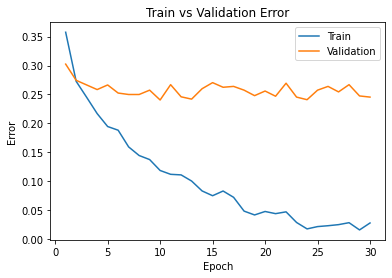

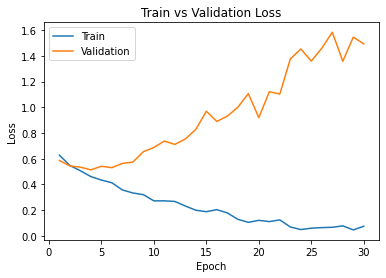

In [92]:
model_path = get_model_name(ann.name, batch_size=256, learning_rate=0.1, epoch=29)
plot_training_curve(model_path)

Still the same problem. Changing the batch size does not seem to help. Changing the learning rate might be the key.

In [93]:
ann = simpleANN()
train_net(net = ann, learning_rate=0.001,batch_size=64)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4565, Train loss: 0.6812658309936523 |Validation err: 0.382, Validation loss: 0.6603339649736881
Epoch 2: Train err: 0.350375, Train loss: 0.6368848609924317 |Validation err: 0.352, Validation loss: 0.6284482628107071
Epoch 3: Train err: 0.327125, Train loss: 0.6101907334327697 |Validation err: 0.3295, Validation loss: 0.609890341758728
Epoch 4: Train err: 0.30925, Train loss: 0.5932393772602081 |Validation err: 0.312, Validation loss: 0.5974772199988365
Epoch 5: Train err: 0.296625, Train loss: 0.5775851521492005 |Validation err: 0.3075, Validation loss: 0.587897066026926
Epoch 6: Train err: 0.281375, Train loss: 0.5625726244449616 |Validation err: 0.291, Validation loss: 0.5763725461438298
Epoch 7: Train err: 0.27, Train loss: 0.547484922170639 |Validation err: 0.289, Validation loss: 0.5695346472784877
Epoch 8: Train err: 0.260125, Train loss: 0.5336883382797242 |Validation err: 0.2775,

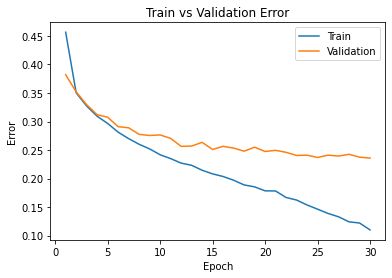

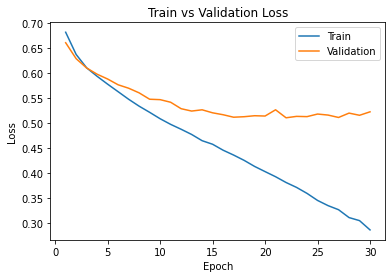

In [94]:
model_path = get_model_name(ann.name, batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

The result is not bad. The validation error and loss seem to be around the same level. Training for longer might make the model overfitting. We may want to stop at epoch 29. 

We obtain the ideal leaning curves here.


In [130]:
model_path = get_model_name(ann.name, batch_size=64, learning_rate=0.001, epoch=28)
state = torch.load(model_path)
ann.load_state_dict(state)

<All keys matched successfully>

In [131]:
ann_err,ann_loss = evaluate(ann,test_loader,nn.BCEWithLogitsLoss())
print("ann error:",ann_err, "ann loss:",ann_loss)

ann error: 0.246 ann loss: 0.5097385924309492


In [132]:
print("cnn error:",cnn_err, "cnn loss:",cnn_loss)

cnn error: 0.13 cnn loss: 0.3152667754329741


By comparing the 2 networks' test accuracies, It is obvious that CNN structure does a better job in handling image data classification problems.

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_1_ANN_and_PyTorch.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus